In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import calendar

### variable

- PatientId - 환자를 식별할수 식별자
- AppointmentID - 예약의 식별자
- Gender = 성별 (여성의 비율이 크다, woman takes way more care of they health in comparison to man.) 
- ScheduledDay = 진료예약을 접수한 날짜
- AppointmentDay = 실제 진료 예약 날짜(진료를 받는날) 
- Age = 환자의 나이
- Neighbourhood = 병원이 있는 위치
- Scholarship = (Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hipertension = 고혈압의 여부
- Diabetes = 당뇨병 여부
- Alcoholism = 알코올 중독의 여부
- Handcap = 장애의 수 (0,1,2,3,4)
- SMS_received = 1건 또는 그 이상 메세지를 환자에게 보냈는지의 여부 (0: 환자에게 메세지를 보내지 않음, 1: 환자에게 메세지를 보냄)
- No-show = 진료예약한 날짜에 진료를 받기위해 나타났는지의 여부. (Yes: 오지 않음, No: 병원 방문함)

In [2]:
df=pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### PatientId

- 데이터는 62,299명의 진료예약에 관한 정보를 담고 있음을 알 수 있다.
- 그러므로 동일한 인원이 받은 기록이 있음을 확인 할 수 있다.

In [7]:
len(set(df.PatientId)) 

62299

### AppointmentId

- 레코드의 식별자 역할은 PatientId가 아닌 AppointmentId이다.

In [8]:
len(set(df.AppointmentID))

110527

진료예약 접수 시간에 의한 순차적인 흐름을 보이고는 있지만 전부다 일치하는 것은 아니므로 AppointmentID가 진료예약 접수 시간의 순차에 완벽하게 따른다고 할 수 없다.

In [9]:
sum(df.sort_values(by=["ScheduledDay"])["AppointmentID"].values==df.sort_values(by=["AppointmentID"])["AppointmentID"].values)

102213

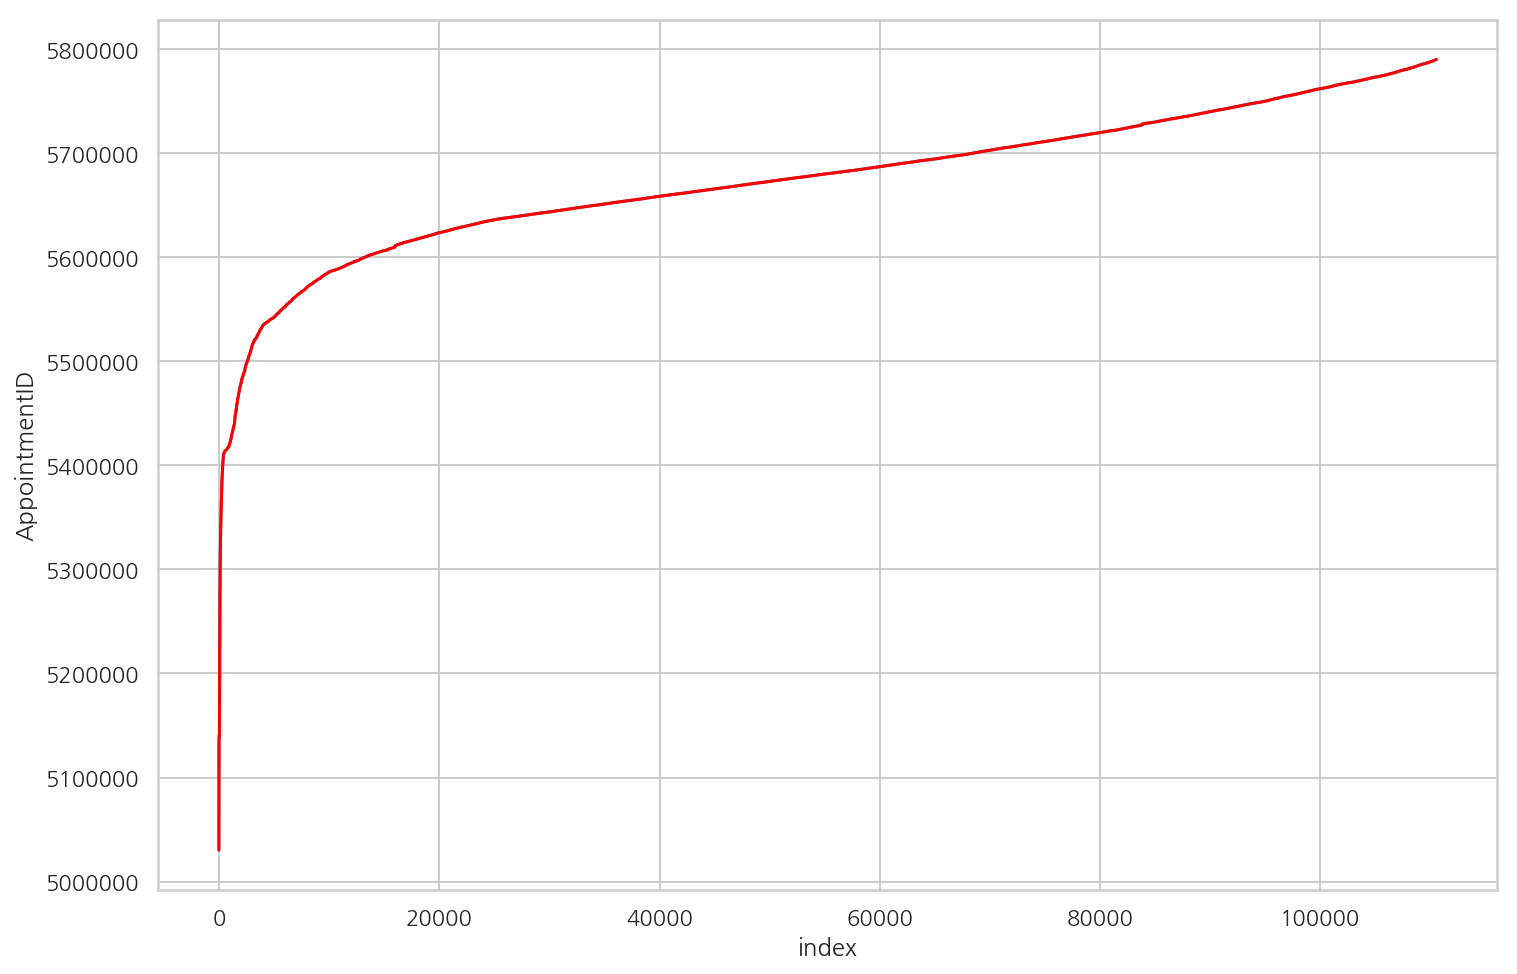

In [10]:
plt.figure(figsize=(12,8))
# plt.subplot(121)
plt.xlabel("index")
plt.ylabel("AppointmentID")
plt.plot(df.sort_values(by=["ScheduledDay"])["AppointmentID"].values)
# plt.subplot(122)
plt.plot(df.sort_values(by=["AppointmentID"])["AppointmentID"].values, color="red")
# plt.xlabel("index")
plt.show()

### Gender

- 전체 데이터에서 여성이 71,840명, 남성이 38,687명으로  여성이 절반이상인 약 65%를 차지하고 있음을 확인 할 수 있다.

In [11]:
df.groupby("Gender").size()/len(df)

Gender
F    0.649977
M    0.350023
dtype: float64

여성과 남성은 거의 비슷한 비율로 예약날짜에 오지 않았다는 사실을 확인 할 수 있다.

In [12]:
(df.groupby(["Gender","No-show"]).size()/df.groupby("Gender").size()).reset_index(inplace=False, name="prop")

,Gender,No-show,prop
0,F,No,0.796854
1,F,Yes,0.203146
2,M,No,0.800321
3,M,Yes,0.199679


### ScheduledDay

In [13]:
df["scheduled_ymd"]=df.ScheduledDay.apply(lambda x : x[:10])

In [14]:
# scheduledDay을 연, 월, 일, 시간, 분, 시간+분+초, 요일형태로 변환
df["scheduled_Year"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.year)
df["scheduled_month"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.month)
df["scheduled_day"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.day)
df["scheduled_Hour"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.hour)
df["scheduled_Minute"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.minute)
df["scheduled_dayofweek"] = pd.to_datetime(df.ScheduledDay).apply(lambda x : calendar.weekday(x.timetuple().tm_year, x.timetuple().tm_mon, x.timetuple().tm_mday))

### AppointmentDay

In [15]:
df["appoint_ymd"]=df.AppointmentDay.apply(lambda x : x[:10])

In [16]:
df["appoint_Year"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.year)
df["appoint_month"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.month)
df["appoint_day"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.day)
df["appoint_Hour"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.hour)
df["appoint_Minute"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.minute)
df["appoint_dayofweek"] = pd.to_datetime(df.AppointmentDay)\
.apply(lambda x : calendar.weekday(x.timetuple().tm_year, x.timetuple().tm_mon, x.timetuple().tm_mday))

In [17]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,scheduled_Hour,scheduled_Minute,scheduled_dayofweek,appoint_ymd,appoint_Year,appoint_month,appoint_day,appoint_Hour,appoint_Minute,appoint_dayofweek
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,18,38,4,2016-04-29,2016,4,29,0,0,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,16,8,4,2016-04-29,2016,4,29,0,0,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,16,19,4,2016-04-29,2016,4,29,0,0,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,17,29,4,2016-04-29,2016,4,29,0,0,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,16,7,4,2016-04-29,2016,4,29,0,0,4
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,...,8,36,2,2016-04-29,2016,4,29,0,0,4
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,...,15,5,2,2016-04-29,2016,4,29,0,0,4
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,...,15,39,2,2016-04-29,2016,4,29,0,0,4
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,...,8,2,4,2016-04-29,2016,4,29,0,0,4
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,...,12,48,2,2016-04-29,2016,4,29,0,0,4


실제 진료날짜를 나타내는 ScheduleDay와 진료예약을 잡은 날짜를 의미하는 AppointmentDay와의 차이를 구하기 위해 다음과 같은 작업을 하였다.

In [18]:
df["differ_day"]=pd.to_datetime(df.AppointmentDay.apply(lambda x : x[:10]))-pd.to_datetime(df.ScheduledDay.apply(lambda x : x[:10]))

In [ ]:
df.

In [19]:
df.groupby(by=["differ_day"]).size().reset_index(name="count")[:8]

,differ_day,count
0,-6 days,1
1,-1 days,4
2,0 days,38563
3,1 days,5213
4,2 days,6725
5,3 days,2737
6,4 days,5290
7,5 days,3277


In [20]:
df.groupby(by=["differ_day","No-show"]).size().reset_index(name="count")[:8]

,differ_day,No-show,count
0,-6 days,Yes,1
1,-1 days,Yes,4
2,0 days,No,36771
3,0 days,Yes,1792
4,1 days,No,4100
5,1 days,Yes,1113
6,2 days,No,5123
7,2 days,Yes,1602


위의 결과로서 진료를 받는날보다 진료예약을 한 날이 더 이후인 경우를 의미하는 데이터들은 의미가 맞지 않으므로 제거할것이다.

In [21]:
sum(df.differ_day > "1 days")

66746

In [22]:
np.where(df.differ_day=="179 days")

(array([102786, 102788, 102789, 102790, 102791, 102792, 102795, 102796,
        102797, 102799]),)

In [23]:
np.where(df.differ_day=="-6 days")

(array([71533]),)

In [24]:
# df.iloc[102786]
set(list(np.where(df.differ_day=="-6 days")[0])+list(np.where(df.differ_day=="-1 days")[0]))

{27033, 55226, 64175, 71533, 72362}

In [25]:
len(set(df.index)-set(list(np.where(df.differ_day=="-6 days")[0])+list(np.where(df.differ_day=="-1 days")[0])))

110522

In [26]:
df=df.loc[set(df.index)-set(list(np.where(df.differ_day=="-6 days")[0])+list(np.where(df.differ_day=="-1 days")[0]))]\
.reset_index(inplace=False, drop=True)

### Age

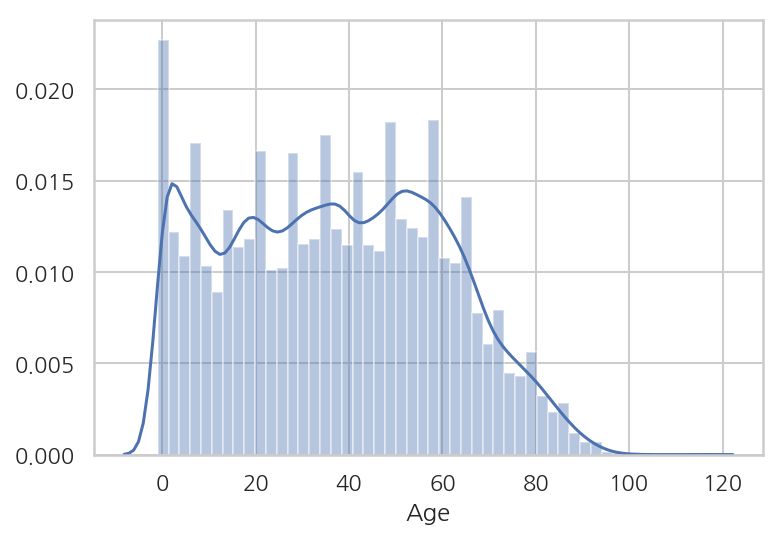

In [27]:
sns.distplot(df.Age)
plt.show()

In [28]:
sum(df.Age==-1)  ### 이건 뭐지????

1

In [29]:
np.where(df.Age==-1)

(array([99827]),)

여성이므로 나이가 -1인것은 임산부가 태아의 진료를 받으려고 예약한 자료라고 추측 해 볼 수 있을 것이다.

In [30]:
np.where(df.PatientId==465943158731293.0)

(array([99827]),)

In [31]:
df.iloc[99827]

PatientId                       4.65943e+14
AppointmentID                       5775010
Gender                                    F
ScheduledDay           2016-06-06T08:58:13Z
AppointmentDay         2016-06-06T00:00:00Z
Age                                      -1
Neighbourhood                         ROMÃO
Scholarship                               0
Hipertension                              0
Diabetes                                  0
Alcoholism                                0
Handcap                                   0
SMS_received                              0
No-show                                  No
scheduled_ymd                    2016-06-06
scheduled_Year                         2016
scheduled_month                           6
scheduled_day                             6
scheduled_Hour                            8
scheduled_Minute                         58
scheduled_dayofweek                       0
appoint_ymd                      2016-06-06
appoint_Year                    

In [32]:
sum(df.Age==0)

3539

In [33]:
df.iloc[np.where(df.Age > 100)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,scheduled_Minute,scheduled_dayofweek,appoint_ymd,appoint_Year,appoint_month,appoint_day,appoint_Hour,appoint_Minute,appoint_dayofweek,differ_day
58012,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,...,14,1,2016-05-03,2016,5,3,0,0,1,0 days
63910,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,...,17,0,2016-05-19,2016,5,19,0,0,3,3 days
63913,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,...,17,0,2016-05-19,2016,5,19,0,0,3,3 days
68124,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,...,29,4,2016-05-16,2016,5,16,0,0,0,38 days
76279,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,...,44,0,2016-05-30,2016,5,30,0,0,0,0 days
90367,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,...,19,1,2016-06-02,2016,6,2,0,0,3,2 days
97661,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,...,57,3,2016-06-03,2016,6,3,0,0,4,15 days


In [34]:
df.iloc[np.where(df.Age==0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,scheduled_Minute,scheduled_dayofweek,appoint_ymd,appoint_Year,appoint_month,appoint_day,appoint_Hour,appoint_Minute,appoint_dayofweek,differ_day
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,...,8,4,2016-04-29,2016,4,29,0,0,4,0 days
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,...,46,2,2016-04-29,2016,4,29,0,0,4,2 days
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,...,28,0,2016-04-29,2016,4,29,0,0,4,4 days
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,...,48,2,2016-04-29,2016,4,29,0,0,4,2 days
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,...,53,4,2016-04-29,2016,4,29,0,0,4,0 days
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,...,37,4,2016-04-29,2016,4,29,0,0,4,0 days
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,...,24,4,2016-04-29,2016,4,29,0,0,4,0 days
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,...,4,3,2016-04-29,2016,4,29,0,0,4,1 days
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,...,29,4,2016-04-29,2016,4,29,0,0,4,21 days
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,...,43,4,2016-04-29,2016,4,29,0,0,4,0 days


PatientId가 나이에 상관이 있는지 확인해 보기 위해 비교해본 결과 다음과 같이 나이에 영향을 받고 있지 않음을 확인할 수 있다.

In [35]:
sum(df.sort_values(by=["Age"])["PatientId"].values==df.sort_values(by=["PatientId"])["PatientId"].values)

2

연령대로 나누는 이유는 10대미만의 사람들은 혼자 오기 보다는 부모님이 동반해서 같이 오는 경향이 많이 있을 것 같아서 부모님과 같이 오게 되는 인원들은 어떠한 어떠한 경향을 보이는지 확인하려고 한다.

In [36]:
df["Age_group"]=df.Age.apply(lambda x : "10대미만" if 0<=x<10  else "10대" if 10<=x<20 else "20대" if 20<=x<30 else "30대" if 30<=x<40 \
             else "40대" if 40<=x<50 else "50대" if 50<=x<60 else "60대" if 60<=x<70 else "70대"  if 70<=x<80 else "80대" \
             if 80<=x<90 else "90대" if 90<=x<100 else "100대" if 100<=x<110 else "110대")

In [37]:
df.groupby(["Age_group","No-show"]).size().reset_index(name="count")

,Age_group,No-show,count
0,100대,No,6
1,10대,No,9679
2,10대,Yes,3256
3,10대미만,No,13991
4,10대미만,Yes,3483
5,110대,No,3
6,110대,Yes,3
7,20대,No,10319
8,20대,Yes,3379
9,30대,No,11871


위의 100세 이상 부터는 인원이 거의 없기 때문에 90세 이상으로 범주를 통일 시켜준다. 인원수가 적은 이유 뿐만 아니라 대체적으로 전 연령대가 예약한 날짜에 진료를 받으러 오지 않는 경향이 있기 때문에 그 경향을 맞추주기 위한 이유도 있다. 예를들어 110대 같은 경우는 예약진료를 받으러 오는 사람과 오지 않는 사람의 비율이 동일한데 이것은 인원이 적기 때문에 그럴 수 있다는 판단하에 범주를 통일 시켜준 것이다.

In [38]:
df["Age_group"]=df.Age.apply(lambda x : "10대미만" if 0<=x<10  else "10대" if 10<=x<20 else "20대" if 20<=x<30 else "30대" if 30<=x<40 \
             else "40대" if 40<=x<50 else "50대" if 50<=x<60 else "60대" if 60<=x<70 else "70대"  if 70<=x<80 else "80대" \
             if 80<=x<90 else "90대이상")

In [39]:
df.groupby(["Age_group","No-show"]).size().reset_index(name="count")

,Age_group,No-show,count
0,10대,No,9679
1,10대,Yes,3256
2,10대미만,No,13991
3,10대미만,Yes,3483
4,20대,No,10319
5,20대,Yes,3379
6,30대,No,11871
7,30대,Yes,3299
8,40대,No,11329
9,40대,Yes,2880


In [40]:
data1=df.groupby(["Age_group","No-show"]).size().reset_index(name="count").loc[0:1].append\
(df.groupby(["Age_group","No-show"]).size().reset_index(name="count").loc[4:])

In [41]:
data1=df.groupby(["Age_group","No-show"]).size().reset_index(name="count").loc[2:3].append(data1)

In [42]:
data1=data1.reset_index(drop=True)

In [43]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'scheduled_ymd', 'scheduled_Year', 'scheduled_month', 'scheduled_day',
       'scheduled_Hour', 'scheduled_Minute', 'scheduled_dayofweek',
       'appoint_ymd', 'appoint_Year', 'appoint_month', 'appoint_day',
       'appoint_Hour', 'appoint_Minute', 'appoint_dayofweek', 'differ_day',
       'Age_group'],
      dtype='object')

### Neighbourhood

- 예약한 병원의 장소

In [44]:
len(set(df.Neighbourhood)) # 81개의 지역정보

81

In [60]:
df.groupby(["Neighbourhood","No-show"]).size()

Neighbourhood        No-show
AEROPORTO            No            7
                     Yes           1
ANDORINHAS           No         1741
                     Yes         521
ANTÔNIO HONÓRIO      No          221
                     Yes          50
ARIOVALDO FAVALESSA  No          220
                     Yes          62
BARRO VERMELHO       No          332
                     Yes          91
BELA VISTA           No         1523
                     Yes         384
BENTO FERREIRA       No          665
                     Yes         193
BOA VISTA            No          254
                     Yes          58
BONFIM               No         2223
                     Yes         550
CARATOÍRA            No         1974
                     Yes         591
CENTRO               No         2631
                     Yes         703
COMDUSA              No          254
                     Yes          56
CONQUISTA            No          689
                     Yes         160
CONSOLAÇÃ

### Scholarship

- 정부의 사회 복지 프로그램 중 하나로써, 학교를 다니고 있는 아이들이 있는 
- 정부의 복지금을 받지 않고 있는 환자들이 많다는 것을 확인 할 수 있다.

In [45]:
df.groupby("Scholarship").size()

Scholarship
0    99661
1    10861
dtype: int64

### Hipertension
- 고혈압을 앓고 있지 않는 환자가 더 많음을 확인 할 수 있다.

In [46]:
df.groupby("Hipertension").size()

Hipertension
0    88721
1    21801
dtype: int64

각각 예약 진료 방문여부에 대해 count를 해보면 다음과 같다.

In [48]:
df.groupby(["Hipertension","No-show"]).size()

Hipertension  No-show
0             No         70179
              Yes        18542
1             No         18029
              Yes         3772
dtype: int64

### Diabetes
- 당뇨병이 없는 환자가 더 많음을 확인 할 수 있다.

In [49]:
df.groupby("Diabetes").size()

Diabetes
0    102579
1      7943
dtype: int64

각각 예약 진료 방문여부에 대해 count를 해보면 다음과 같다.

In [51]:
df.groupby(["Diabetes","No-show"]).size()

Diabetes  No-show
0         No         81695
          Yes        20884
1         No          6513
          Yes         1430
dtype: int64

### Alcoholism
- 알코올 중독 여부를 의미한다.

In [52]:
df.groupby("Diabetes").size()

Diabetes
0    102579
1      7943
dtype: int64

각각 예약 진료 방문여부에 대해 count를 해보면 다음과 같다.

In [54]:
df.groupby(["Diabetes","No-show"]).size()

Diabetes  No-show
0         No         81695
          Yes        20884
1         No          6513
          Yes         1430
dtype: int64

### Handcap

In [55]:
df.groupby("Handcap").size()

Handcap
0    108283
1      2040
2       183
3        13
4         3
dtype: int64

각각 예약 진료 방문여부에 대해 count를 해보면 다음과 같다.

In [56]:
df.groupby(["Handcap","No-show"]).size()

Handcap  No-show
0        No         86374
         Yes        21909
1        No          1676
         Yes          364
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
dtype: int64

### SMS_received

진료 예약 문자를 받은 환자를 의미함.

In [57]:
df.groupby("SMS_received").size()

SMS_received
0    75040
1    35482
dtype: int64

각각 예약 진료 방문여부에 대해 count를 해보면 다음과 같다.

오히려 문자를 안받은 환자들이 더 많이 재방문을 한다고 할 수 있다.

In [58]:
df.groupby(["SMS_received","No-show"]).size()

SMS_received  No-show
0             No         62510
              Yes        12530
1             No         25698
              Yes         9784
dtype: int64

In [59]:
!pip install -U imbalanced-learn

    100% |████████████████████████████████| 174kB 2.6MB/s ta 0:00:01
    100% |████████████████████████████████| 28.8MB 504kB/s ta 0:00:011
    100% |████████████████████████████████| 8.3MB 2.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for imbalanced-learn ... done
  Stored in directory: /Users/heungbaelee/Library/Caches/pip/wheels/94/6c/0c/d7254937a767ff72814aa542997d0e889bed37c1d31ba3de1a
Successfully built imbalanced-learn


In [104]:
xcol_name=list(set(list(df.columns))-set(["No-show","ScheduledDay","AppointmentDay"]))

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[xcol_name], df["No-show"], test_size=0.5, random_state=0)

In [107]:
X_train.

Index(['appoint_Minute', 'appoint_month', 'SMS_received', 'scheduled_Hour',
       'appoint_dayofweek', 'Neighbourhood', 'scheduled_dayofweek',
       'Alcoholism', 'Gender', 'scheduled_day', 'appoint_ymd', 'appoint_Year',
       'Handcap', 'AppointmentID', 'Hipertension', 'scheduled_ymd',
       'Age_group', 'scheduled_Minute', 'PatientId', 'scheduled_Year',
       'appoint_day', 'scheduled_month', 'appoint_Hour', 'differ_day', 'Age',
       'Diabetes', 'Scholarship'],
      dtype='object')

In [106]:
from sklearn.svm import SVC
model = SVC().fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timedelta'